# DS340W - Code

### Ririn Park 






Data reading

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading csv dataset
df = pd.read_csv('pgatour_cleaned.csv', encoding="cp1252", index_col = 0)

#Preview data
df.head(10)

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS
5,Anthony Kim,93,70.128,302.4,60.79,65.35,-0.121,0.794,0.673,6856,4,0,2007,1545195,USA
6,Arron Oberholser,69,69.807,285.5,61.70,62.25,0.362,0.821,1.183,8811,5,0,2007,1797458,USA
7,Bart Bryant,87,70.637,281.1,70.66,66.34,0.198,0.440,0.638,4555,2,0,2007,1167874,USA
8,Ben Curtis,80,71.582,277.1,67.37,60.56,-0.188,-0.561,-0.749,2955,2,0,2007,772321,USA
9,Bill Haas,93,70.653,302.7,62.93,65.98,-0.018,0.426,0.408,2461,3,0,2007,967443,USA


In [300]:
#Look into dimensions and number of observations
print(df.shape)

df.info

(2044, 15)


<bound method DataFrame.info of                    NAME  ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  \
0        Aaron Baddeley      83   70.088           291.9  60.00  60.35  0.629   
1            Adam Scott      69   70.008           300.9  59.17  65.44  0.129   
2            Alex Cejka      80   70.437           288.9  68.08  69.44 -0.479   
3         Anders Hansen      55   70.856           280.7  66.95  62.85 -0.176   
4         Andrew Buckle      77   71.443           294.7  58.14  62.52  0.161   
...                 ...     ...      ...             ...    ...    ...    ...   
2039           Whee Kim      74   70.964           289.4  54.32  62.09  0.456   
2040     William McGirt      89   71.151           284.8  70.06  67.23 -0.018   
2041  Xander Schauffele      96   70.163           306.3  57.68  67.74  0.342   
2042          Zac Blair     105   71.007           272.7  69.70  64.70  0.035   
2043       Zach Johnson      81   70.393           286.8  66.54  64.16  0.415

In [301]:
#make winner column
df['Winner'] = df['1ST'].apply(lambda x: 1 if int(x) >= 1 else 0)

In [302]:
df2 = df[~df['Year'].isin([2007, 2008])]
df2.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY,Winner
389,Aaron Baddeley,66,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431,2,0,2009,837065,AUS,0
390,Adam Scott,53,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432,1,0,2009,783138,AUS,0
391,Alex Cejka,82,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416,3,0,2009,953664,GER,0
392,Andres Romero,58,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329,2,0,2009,789305,ARG,0
393,Anthony Kim,76,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420,3,0,2009,1972155,USA,0


EDA

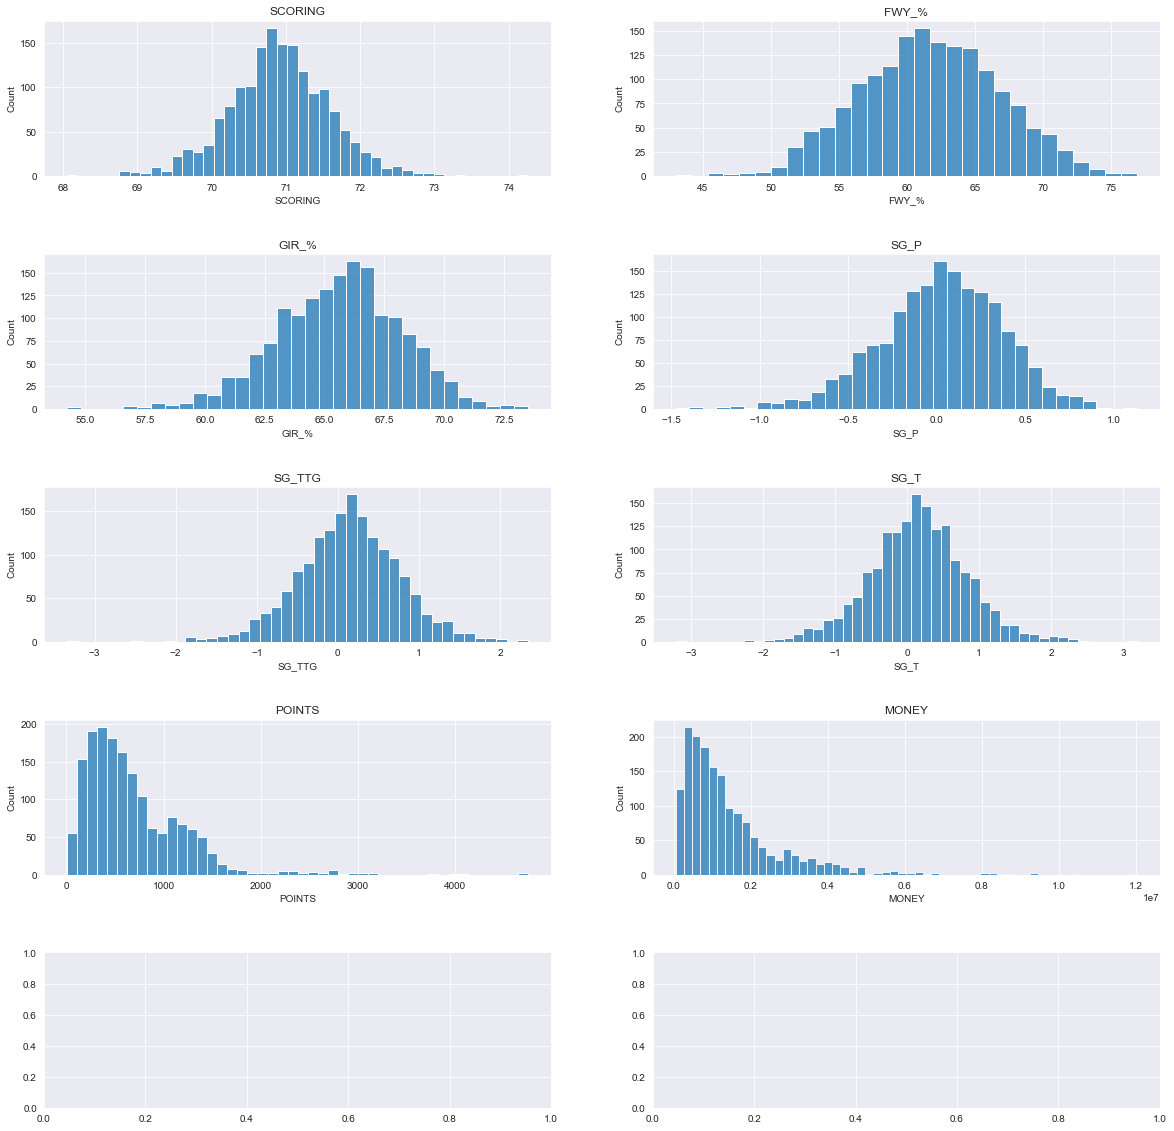

In [303]:
f, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(20,20))
columns = ['SCORING', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'MONEY']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.histplot(df2[column], ax=ax[row][col])
    g.set(title =  column)
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

### Exploration of Winner Class

Boxplot of scoring average by Year among winners and non-winners

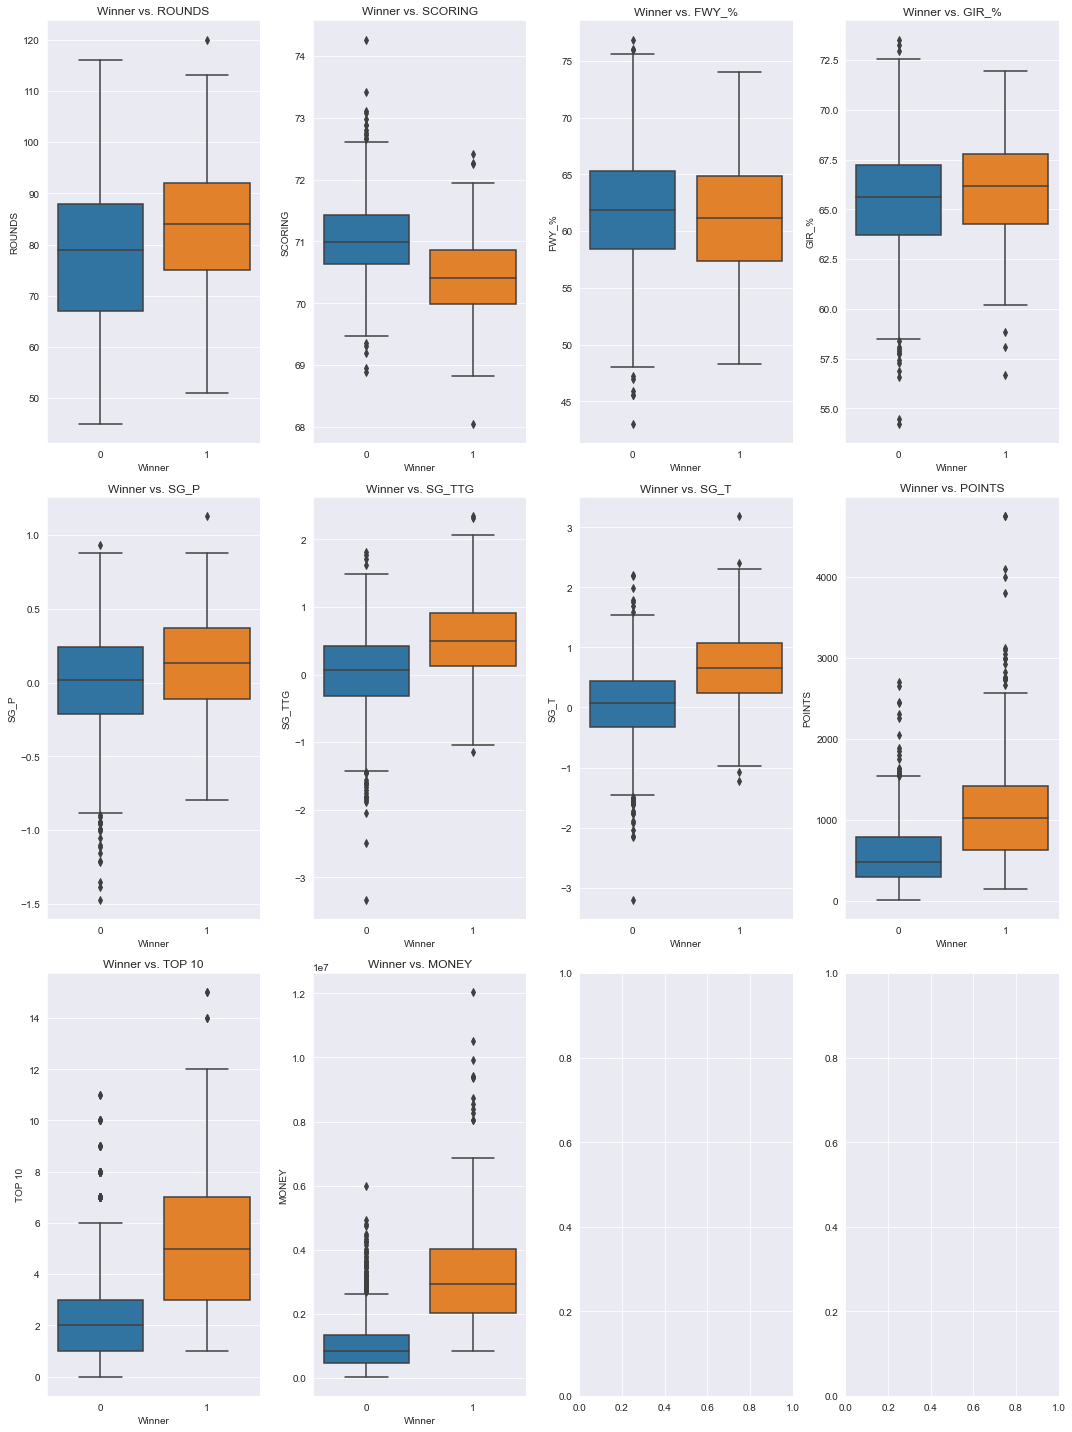

In [304]:
columns = ['ROUNDS', 'SCORING', 'FWY_%', 'GIR_%', 'SG_P',
           'SG_TTG', 'SG_T', 'POINTS', 'TOP 10', 'MONEY']
n_rows = 3
n_cols = 4

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through columns and create plots
for ax, column in zip(axes, columns):
    sns.boxplot(x='Winner', y=column, data=df2, ax=ax)
    ax.set_title(f"Winner vs. {column}")

# Adjust spacing
plt.tight_layout()
plt.show()

### Exploration of Top 10 placings

[(68.0, 73.0),
 Text(0.5, 1.0, "# of top 10's vs scoring average"),
 Text(0, 0.5, 'Scoring Average')]

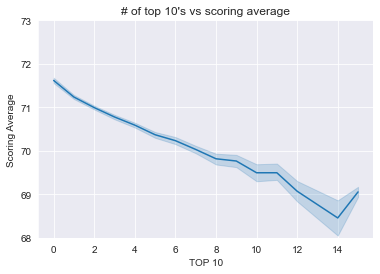

In [305]:
lp = sns.lineplot(x="TOP 10", y="SCORING", data=df2)
lp.set(ylim=(68, 73), title="# of top 10's vs scoring average", ylabel="Scoring Average")

### Feature Selection

In [306]:
#Assign name and target
names = df2['NAME']
target = df2['Winner']
#Drop columns
df2.drop(['NAME', '1ST', 'Winner'], axis=1, inplace=True)

#Get dummies for country
df2 = pd.get_dummies(df2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Domain Feature Creation

In [307]:
#copy of dataset to include domain features
domain_feats = df2.copy()

#Creating Money per round feature
domain_feats['MONEY_PER_ROUND'] = domain_feats['MONEY'] / domain_feats['ROUNDS']

### Polynomial Feature Creation

In [308]:
# Copy the original data
poly_features = df2.copy()

# Import
from sklearn.preprocessing import PolynomialFeatures

# Create degree 2 polynomial features
poly_transformer = PolynomialFeatures(degree=2)

# Train poly features
poly_transformer.fit(poly_features.iloc[:, :13])

# Transform features
poly_features_array = poly_transformer.transform(poly_features.iloc[:, :13])

# Generate column for transformed features
poly_feature_names = poly_transformer.get_feature_names_out(input_features=poly_features.columns[:13])

# Convert back to a DataFrame
import pandas as pd
poly_features = pd.DataFrame(poly_features_array, columns=poly_feature_names)

print('Polynomial Features Shape:', poly_features.shape)


Polynomial Features Shape: (1655, 105)


## Model Implementation

In [309]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score, recall_score, f1_score

In [310]:
def random_forest_classifier(X, y, test_size=0.33, random_state=40, n_estimators=200):
    """Train and evaluate a Random Forest Classifier."""
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Plot feature importances
    plot_feature_importance(features=X.columns, importances=model.feature_importances_)

    # Generate predictions
    y_pred = model.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=model.classes_)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and return ROC AUC score
    return calc_precision(y_true=y_test, y_pred=y_pred), calc_recall(y_true=y_test, y_pred=y_pred), calc_f1(y_true=y_test, y_pred=y_pred)

def calc_precision(y_true, y_pred):
    """Calculate and return Precision."""
    precision = precision_score(y_true, y_pred, average='binary')
    print(f"Precision: {precision:.4f}")
    return precision

def calc_recall(y_true, y_pred):
    """Calculate and return Recall."""
    recall = recall_score(y_true, y_pred, average='binary')
    print(f"Recall: {recall:.4f}")
    return recall

def calc_f1(y_true, y_pred):
    """Calculate and return F1-Score."""
    f1 = f1_score(y_true, y_pred, average='binary')
    print(f"F1-Score: {f1:.4f}")
    return f1


def plot_feature_importance(features, importances, top_n=10):
    """Plot the top N feature importances."""
    feature_importance = pd.DataFrame({"Features": features, "Importance": importances})
    feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
    
    plt.figure(figsize=(16, 8))
    sns.barplot(x=feature_importance['Features'][:top_n], y=feature_importance['Importance'][:top_n])
    plt.title("Top Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot the confusion matrix."""
    cf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()




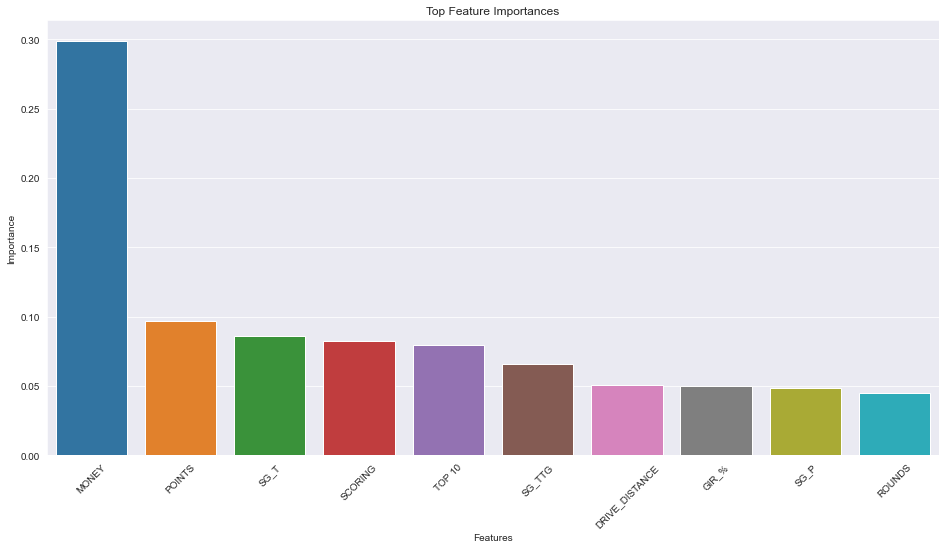

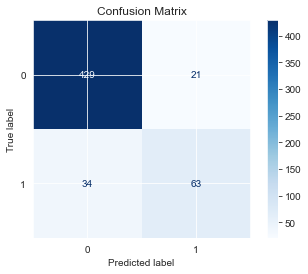

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       450
           1       0.75      0.65      0.70        97

    accuracy                           0.90       547
   macro avg       0.84      0.80      0.82       547
weighted avg       0.90      0.90      0.90       547

Precision: 0.7500
Recall: 0.6495
F1-Score: 0.6961


In [311]:
base_model = random_forest_classifier(df2, target)

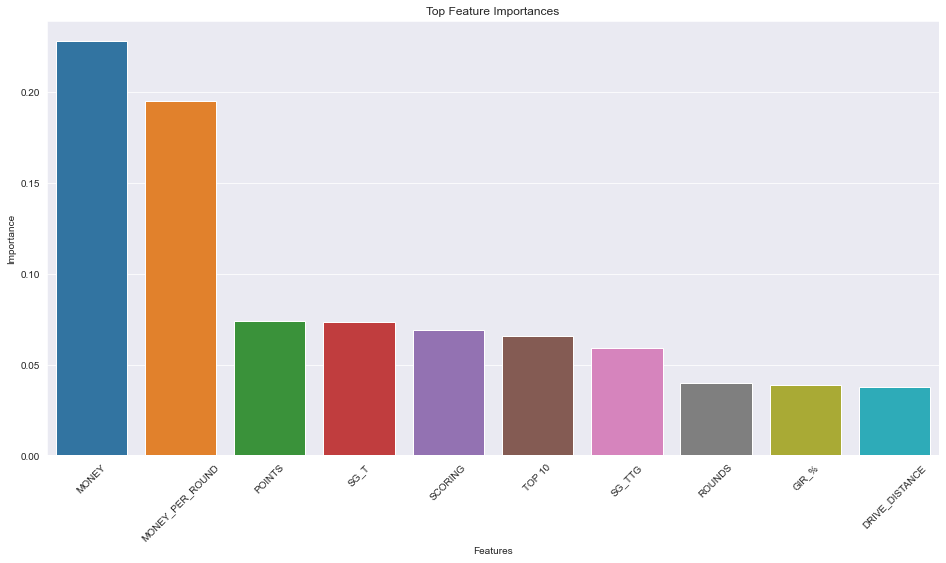

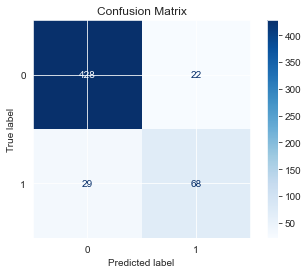

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       450
           1       0.76      0.70      0.73        97

    accuracy                           0.91       547
   macro avg       0.85      0.83      0.84       547
weighted avg       0.90      0.91      0.91       547

Precision: 0.7556
Recall: 0.7010
F1-Score: 0.7273


In [312]:
domain_model = random_forest_classifier(domain_feats, target)

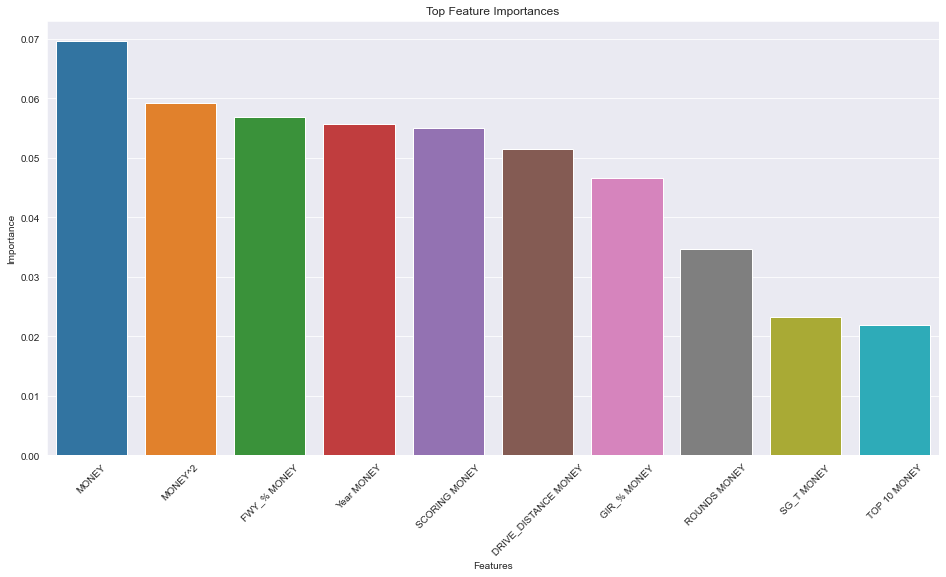

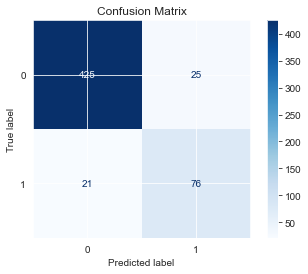

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       450
           1       0.75      0.78      0.77        97

    accuracy                           0.92       547
   macro avg       0.85      0.86      0.86       547
weighted avg       0.92      0.92      0.92       547

Precision: 0.7525
Recall: 0.7835
F1-Score: 0.7677


In [313]:
poly_model = random_forest_classifier(poly_features, target)

### Model Performance Results

In [314]:
results = pd.DataFrame([base_model, domain_model, poly_model], index=['Baseline Model', 'Domain Feature Model', 'Polynomial Feature Model'], columns = ['Precision','Recall','F1'])
results

,Precision,Recall,F1
Baseline Model,0.750000,0.649485,0.696133
Domain Feature Model,0.755556,0.701031,0.727273
Polynomial Feature Model,0.752475,0.783505,0.767677
